# Logistic Regression
- This is used when the dependent variable(target is categorical). For example:
    - Predict email wheather spam(1) or not(0)
    - Predict tumor is malignant(1) or not(0)

In [1]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model

**I use iris dataset which is dataset of 3 flowers, but i only use 2 of this to classify**

In [2]:
iris = datasets.load_iris()

#show all the key in the iris dataset
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
# It contain 3 classes
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
# each class has 4 features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# show first 5 data
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
# to simplify we take just the first 2 feature columns and 2 classes
X = iris.data[:100,:2]
y = iris.target[(iris.target == 0) | (iris.target == 1)]

In [8]:
X.shape

(100, 2)

In [9]:
y.shape

(100,)

In [26]:
X[:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

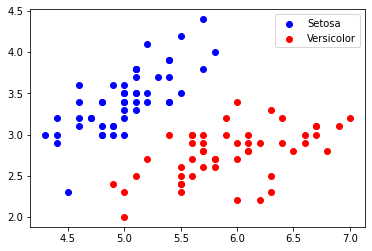

In [12]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='Setosa')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='Versicolor')
plt.legend();

## Sigmoid function

- Unlike the linear regression that take input return output with infinite range. The logistic regression use a function that give outputs between 0 and 1 for all input.

- We use in this case is `Sigmoid function`
- $$\text{Sigmoid Function = }\frac{1}{1+e^{-z}}$$



In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

<Figure size 936x504 with 0 Axes>

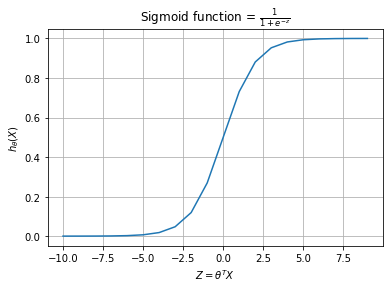

<Figure size 936x504 with 0 Axes>

In [14]:
# Graphically, the sigmoid function looks like so:
a = np.arange(-10.0, 10.0)
b = sigmoid(a)


## Config the graph
plt.plot(a,b)
plt.title(r'Sigmoid function = $\frac{1}{1+e^{-z}}$')
plt.xlabel(r'$Z = \theta^T X$')
plt.ylabel(r'$h_{\theta}(X)$')
plt.grid(True)
plt.figure(figsize=(13,7))



- you see that if:
    - $z \to \infty$ the $y(predicted) \to 1$
    - $z \to -\infty$ the $y(predicted) \to 0$

## Loss function:
- *Linear regression* use least square as loss function that give a convex graph and then we can complete optimization by finding its global minimum
- However, it's not an option for *Logistic Regression* anymore. Since the hypothesis is changed, then the graph is non-convex graph
- The loss function of logistic regression doing exactly which is Logistic Loss. If you predict well your loss is low, otherwish your loss is high.
- From the below image you can see that If your data give you y=1 then your cost function small when your hypothesis close to 1 and If your data y=0 then your cost function small when your hypothesis close to 0. Otherwise the cost function is very large
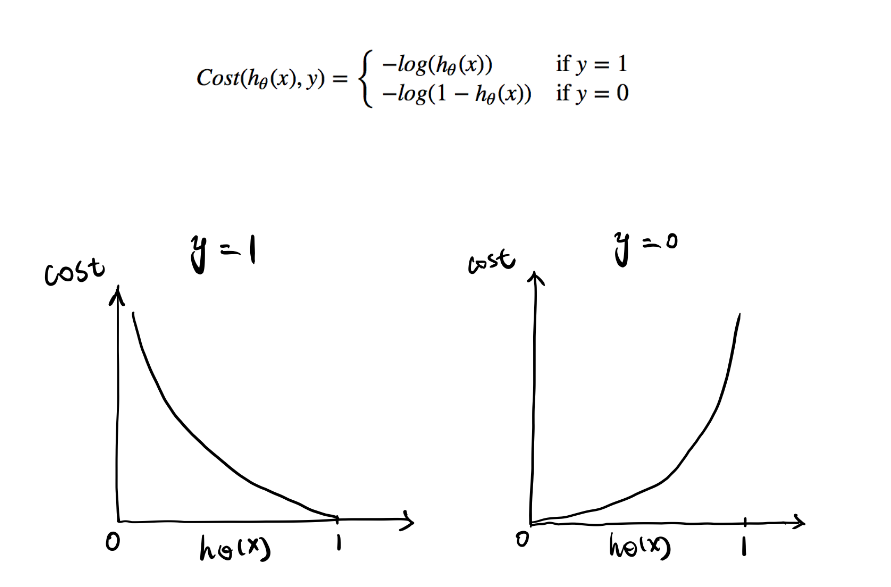

- We can put it all into single formular:
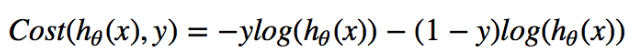

- Then the cost function is sum of all training data sample
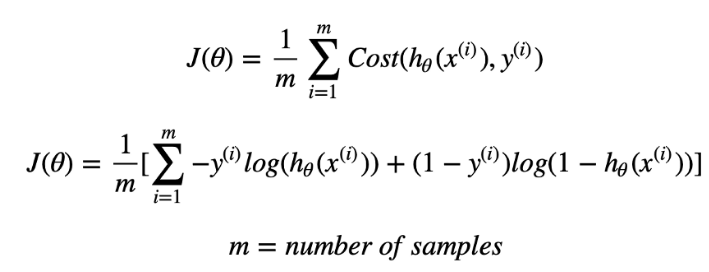

In [15]:
def cost(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [16]:
num_iter = 100000
lr = 0.01

def gradient_descent(X, y):   
    # weights initialization
    theta = np.zeros(X.shape[1])
        
    for i in range(num_iter):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        theta -= lr * gradient
            
        loss = cost(h, y)
                
        if i % 10000 == 0:
            # Add something here to capture the 10 costs so that I can plot it against # of iterations
            print(f'cost: {loss} \t', f'weights: {theta} \t')

In [17]:
descent_dict = gradient_descent(X,y)

cost: 0.6931471805599453 	 weights: [ 0.002325 -0.001645] 	
cost: 0.10260423419679636 	 weights: [ 2.9583909  -5.17692115] 	
cost: 0.07720668731492417 	 weights: [ 3.73720829 -6.53764916] 	
cost: 0.0678974301507437 	 weights: [ 4.21347597 -7.37005928] 	
cost: 0.06308053637421251 	 weights: [ 4.55682697 -7.97061521] 	
cost: 0.06016620405950038 	 weights: [ 4.82405026 -8.43838164] 	
cost: 0.058235876015888394 	 weights: [ 5.04154261 -8.81937336] 	
cost: 0.0568791940361415 	 weights: [ 5.22385055 -9.13894247] 	
cost: 0.05588486152005994 	 weights: [ 5.37989089 -9.41263014] 	
cost: 0.05513298744574815 	 weights: [ 5.51554602 -9.65069094] 	


In [22]:
# Just copy and pasted it from above
final_weights = np.array([ 5.51554602, -9.65069094])


In [19]:
def predict_prob(X, theta):
    final_pred = sigmoid(np.dot(X, theta))
    return final_pred.round()


In [25]:
predictions = predict_prob(X, final_weights)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]  
accuracy = sum(correct) / len(correct) 
print('accuracy = {:0.2f}%'.format(accuracy*100))

accuracy = 99.00%
